In [3]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True


## Histograms ##

In [ ]:
top = Table.read_table('top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [5]:
millions = top.select(0).with_columns('Adjusted Gross', 
                                     np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Gone with the Wind,1796.18
Star Wars,1583.48
The Sound of Music,1266.07
E.T.: The Extra-Terrestrial,1261.08
Titanic,1204.37
The Ten Commandments,1164.59
Jaws,1138.62
Doctor Zhivago,1103.56
The Exorcist,983.23
Snow White and the Seven Dwarves,969.01


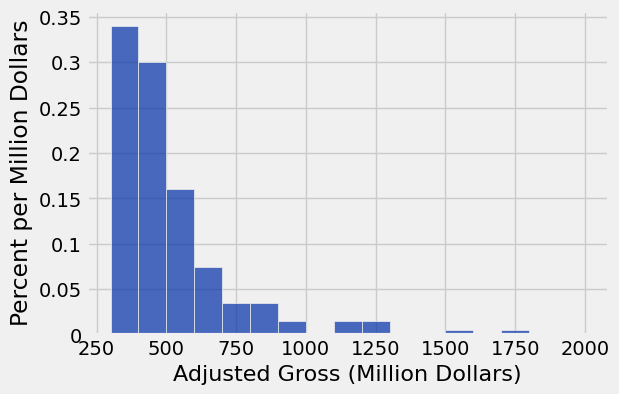

In [6]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

# What is "percent per unit"?

In [7]:
millions_binned = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))

In [13]:
num_movies = top.num_rows
num_movies

200

In [14]:
percents = (millions_binned.column('Adjusted Gross count') / num_movies) * 100
percents

array([ 34. ,  30. ,  16. ,   7.5,   3.5,   3.5,   1.5,   0. ,   1.5,
         1.5,   0. ,   0. ,   0.5,   0. ,   0.5,   0. ,   0. ,   0. ])

In [15]:
percents_per_unit = percents / 100 # our bin widths are all 100
percents_per_unit

array([ 0.34 ,  0.3  ,  0.16 ,  0.075,  0.035,  0.035,  0.015,  0.   ,
        0.015,  0.015,  0.   ,  0.   ,  0.005,  0.   ,  0.005,  0.   ,
        0.   ,  0.   ])

# Why use percent per unit?

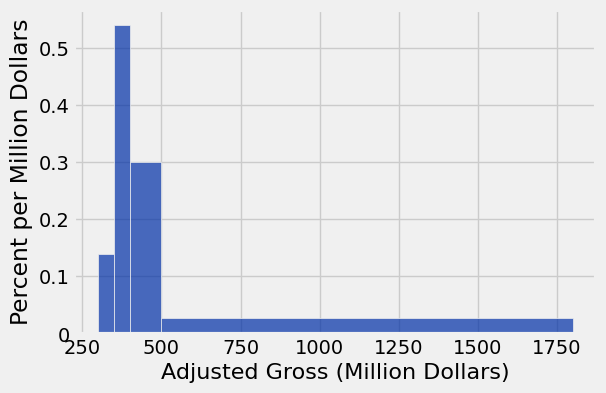

In [16]:
# Plotting again with uneven bins
uneven = make_array(300, 350, 400, 500, 1800)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

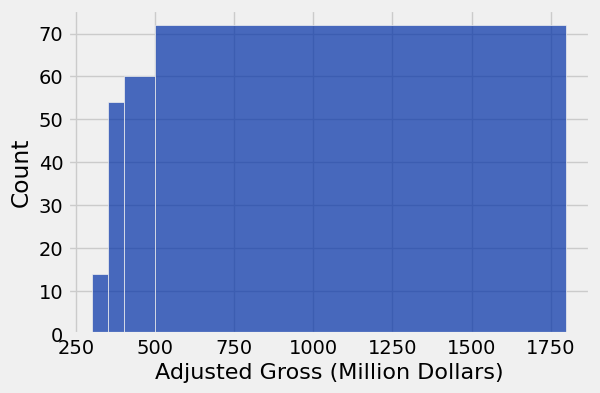

In [17]:
# Plotting the counts directly is misleading as a visualization
millions.hist('Adjusted Gross', bins=uneven, unit = 'Million Dollars', normed=False)

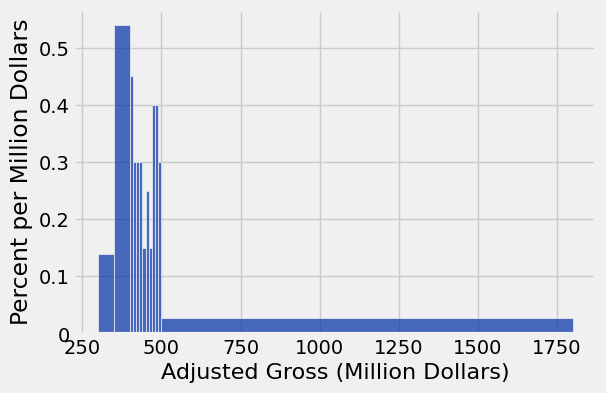

In [18]:
# Another example of the area principle
some_tiny_bins = make_array(
    300, 350, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 1800)
millions.hist('Adjusted Gross', bins=some_tiny_bins, unit='Million Dollars')

# Practice
Produce a histogram that visualizes the ages (not the year of release) of the movies in top_movies. Use 10 automatically generated bins.
1. Produce an array that contains the age of each movie.
2. Attach the array as a new column to top_movies.
3. Generate the histogram of your new column.

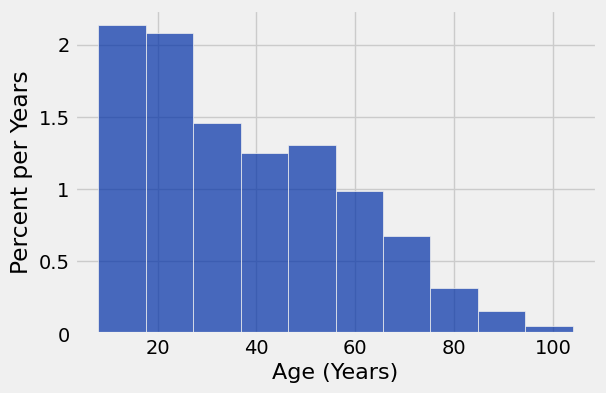

In [40]:
years = top.column('Year')
years

age = 2025 - years

new_col = top.with_column('Age', age)


new_col.hist('Age', bins = 10, unit = 'Years')

